In [1]:
%matplotlib inline
import baby
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = baby.VAEDataset("E:\\epq-datasets\\CelebA_aligned\\train", batch_size=96, image_size=128, prefetch=16, workers=4)
val_dataset = baby.VAEDataset("E:\\epq-datasets\\CelebA_aligned\\val", batch_size=96, image_size=128, prefetch=16, workers=4)

In [3]:
total = len(val_dataset)
data = []
for i, batch in enumerate(val_dataset):
    data.append((i, batch.shape[0]))
    print(f"\r{i}/{total}, {batch.shape[0]}", end="")

75/428, 96

KeyboardInterrupt: 

In [ ]:
batch

In [5]:
VAEModel = baby.models.BABYModelRecreate(latent_dim=32, output_size=(128,128), lr=1e-4)
VAEModel.fit(train_dataset, val_dataset=val_dataset, epochs=100)

Epoch 1/100
[01679|01681] [==============================> ] [00:05:03] - loss: 1471.93 kl_divergence: 23.28 reconstruction_error: 1448.65           
[00350|00428] [=========================>      ] [00:01:01] - val_loss: 775.59 val_kl_divergence: 9.61 val_reconstruction_error: 765.98           
Checkpoint saved to epoch0001of0100.ckpt
Epoch 2/100
[00118|01681] [=>                              ] [00:02:21] - loss: 1194.46 kl_divergence: 12.76 reconstruction_error: 1181.69           

KeyboardInterrupt: 

In [ ]:
#VAEModel.load_weights("E:\\EPQ\\code\\checkpoints\\20200913-222758\\epoch0002of0100.ckpt")

In [1]:
images = next(train_dataset)
#pred = VAEModel.predict_images(images).numpy()
mean, stdev = VAEModel.encode(images)
eps = mean + (tf.random.normal(shape=mean.shape) * stdev)
pred = VAEModel.decode(eps)
index = 0 

NameError: name 'train_dataset' is not defined

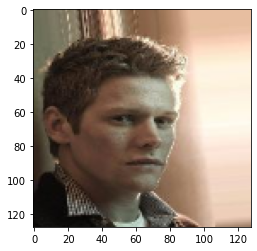

In [18]:
index += 1
plt.imshow(images[index])

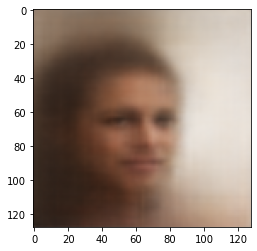

In [19]:
plt.imshow(pred[index][:,:,0:3])

In [24]:
pred[index].shape

TensorShape([128, 128, 3])